<a href="https://colab.research.google.com/github/dsogden/Quantitative_Finance/blob/main/Model_Misspecification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt
import yfinance as yf

## Exclusion of important variables

In [19]:
start = '2013-01-01'
end = '2015-01-01'

bench = yf.download('SPY', start=start, end=end)['Close']
a1 = yf.download('LRCX', start=start, end=end)['Close']
a2 = yf.download('AAPL', start=start, end=end)['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [20]:
slrl1 = regression.linear_model.OLS(a2, sm.add_constant(a1)).fit()
slrb1 = regression.linear_model.OLS(a1, sm.add_constant(bench)).fit()
slrb2 = regression.linear_model.OLS(a2, sm.add_constant(bench)).fit()

In [21]:
print('R2 values of linear regression')
print(f'LRCX and AAPL: {slrl1.rsquared}')
print(f'LRCX and SPY: {slrb1.rsquared}')
print(f'AAPL and SPY: {slrb2.rsquared}')

R2 values of linear regression
LRCX and AAPL: 0.9114588344215999
LRCX and SPY: 0.8746056102007451
AAPL and SPY: 0.7959755586204602


In [22]:
start = '2009-01-01'
end = '2015-01-01'

bench = yf.download('SPY', start=start, end=end)['Close']
a1 = yf.download('LRCX', start=start, end=end)['Close']
a2 = yf.download('AAPL', start=start, end=end)['Close']

slrl1 = regression.linear_model.OLS(a2, sm.add_constant(a1)).fit()
slrb1 = regression.linear_model.OLS(a1, sm.add_constant(bench)).fit()
slrb2 = regression.linear_model.OLS(a2, sm.add_constant(bench)).fit()

print('R2 values of linear regression')
print(f'LRCX and AAPL: {slrl1.rsquared}')
print(f'LRCX and SPY: {slrb1.rsquared}')
print(f'AAPL and SPY: {slrb2.rsquared}')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

R2 values of linear regression
LRCX and AAPL: 0.4998138960650015
LRCX and SPY: 0.7472986038731746
AAPL and SPY: 0.7563500006571211


## Inclusion of unnecessary variables

In [23]:
start = '2014-01-01'
end = '2015-01-01'

x1 = yf.download('PEP', start=start, end=end)['Close']
x2 = yf.download('MCD', start=start, end=end)['Close']
# x3 = yf.download('ATHS', start=start, end=end)['Close']
x3 = yf.download('DJI', start=start, end=end)['Close']
y = yf.download('PG', start=start, end=end)['Close']

slr = regression.linear_model.OLS(y, sm.add_constant(x1)).fit()
slr_prediction = slr.params[0] + slr.params[1] * x1

X = np.column_stack((x1, x2, x3))
mlr = regression.linear_model.OLS(y, sm.add_constant(X)).fit()
mlr_prediction = mlr.params[0] + mlr.params[1] * x1 + mlr.params[2] + mlr.params[3] * x3

print(f'Linear Regression (1 var): {slr.rsquared_adj}')
print(f'Multiple Regression (4 vars): {mlr.rsquared_adj}')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Linear Regression (1 var): 0.7152299350889384
Multiple Regression (4 vars): 0.8040941779968929


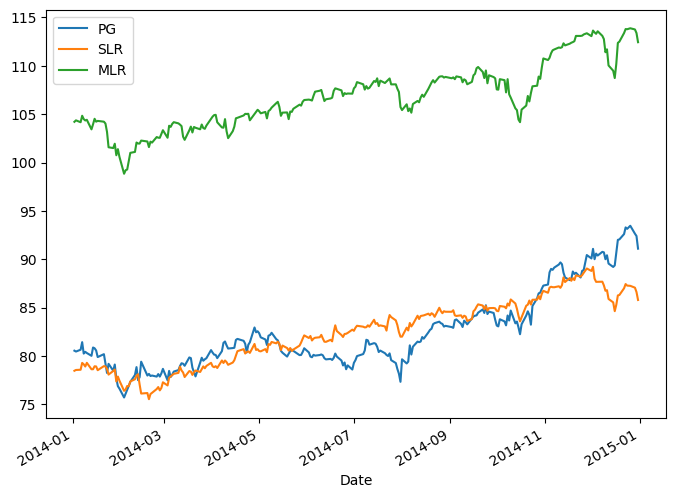

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
y.plot(ax=ax)
slr_prediction.plot(ax=ax)
mlr_prediction.plot(ax=ax)
ax.legend(['PG', 'SLR', 'MLR'])
plt.show()

In [25]:
start = '2015-01-01'
end = '2015-06-01'

x1 = yf.download('PEP', start=start, end=end)['Close']
x2 = yf.download('MCD', start=start, end=end)['Close']
# x3 = yf.download('ATHS', start=start, end=end)['Close']
x3 = yf.download('DJI', start=start, end=end)['Close']
y = yf.download('PG', start=start, end=end)['Close']

# slr = regression.linear_model.OLS(y, sm.add_constant(x1)).fit()
slr_prediction = slr.params[0] + slr.params[1] * x1

X = np.column_stack((x1, x2, x3))
# mlr = regression.linear_model.OLS(y, sm.add_constant(X)).fit()
mlr_prediction = mlr.params[0] + mlr.params[1] * x1 + mlr.params[2] + mlr.params[3] * x3

print(f'\nLinear Regression (1 var): {slr.rsquared_adj}')
print(f'Multiple Regression (4 vars): {mlr.rsquared_adj}')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Linear Regression (1 var): 0.7152299350889384
Multiple Regression (4 vars): 0.8040941779968929


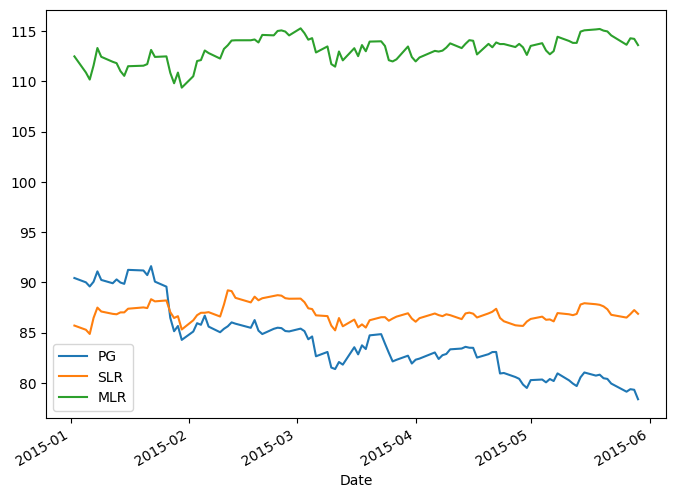

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
y.plot(ax=ax)
slr_prediction.plot(ax=ax)
mlr_prediction.plot(ax=ax)
ax.legend(['PG', 'SLR', 'MLR'])
plt.show()

## Pooling different populations

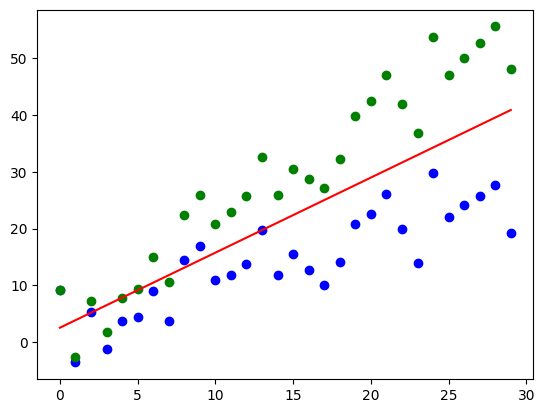

In [27]:
sample1 = np.arange(30) + 4 * np.random.randn(30)
sample2 = sample1 + np.arange(30)
pool = np.hstack((sample1, sample2))

model = regression.linear_model.OLS(pool, sm.add_constant(np.hstack((np.arange(30),np.arange(30))))).fit()

plt.scatter(np.arange(30), sample1, color='b')
plt.scatter(np.arange(30), sample2, color='g')
plt.plot(model.params[0] + model.params[1] * np.arange(30), color='r')
plt.show()

## Nonstationary time series

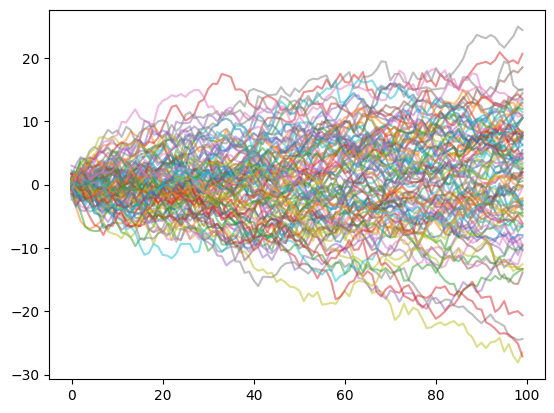

In [28]:
# Generate normally distributed errors
randos = [np.random.randn(100) for i in range(100)]
y = np.random.randn(100)
# Generate random walks
randows = [[sum(rando[:i+1]) for i in range(100)] for rando in randos]
yw = [sum(y[:i+1]) for i in range(100)]

for i in range(100):
    plt.plot(randows[i], alpha=0.5)

Linearly correlated walks out of 100: 17


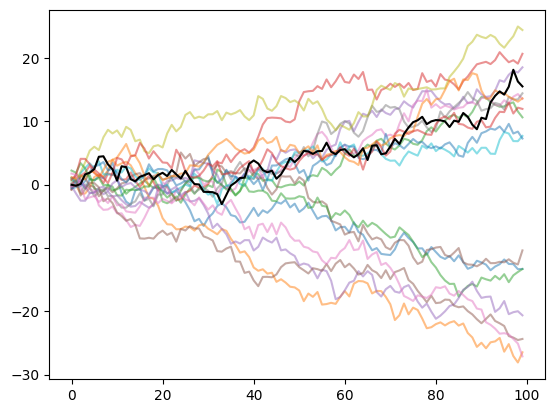

In [33]:
rs = [regression.linear_model.OLS(yw, x).fit().rsquared for x in randows]

rcount = 0
for i in range(100):
    if rs[i] > 0.8:
        rcount += 1
        plt.plot(randows[i], alpha=0.5, label=f'walk{i}')
print(f'Linearly correlated walks out of 100: {rcount}')

plt.plot(yw, color='k', label='yw')
# plt.legend()
plt.show()

Significantly correlated walk out of 100: 88


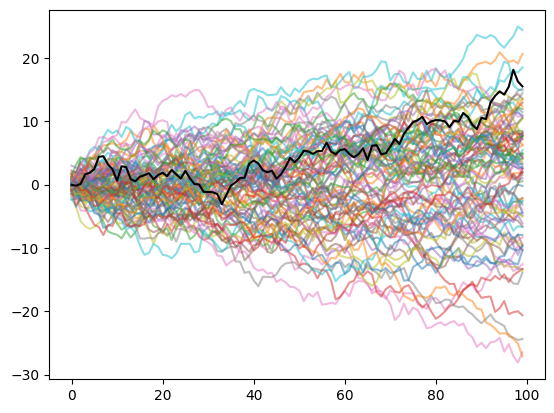

In [35]:
from scipy.stats import pearsonr

ps = [pearsonr(yw, x)[1] for x in randows]

pcount = 0
for i in range(100):
    if ps[i] < 0.05:
        pcount += 1
        plt.plot(randows[i], alpha=0.5)
print(f'Significantly correlated walk out of 100: {pcount}')
plt.plot(yw, color='k')
plt.show()

In [36]:
from statsmodels.tsa.stattools import adfuller

print(f'{adfuller(yw)[1]}')

0.9346175202470021
